In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

import h5py


from scipy.optimize import curve_fit

In [80]:
symmetrizeArray(np.asarray([2,1,2,3,7,8]),-1)

array([-8, -7, -3, -2, -1,  2,  1,  2,  3,  7,  8])

# Broken phase

$z=-2, \chi=5$

In [3]:
data1 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8,  data_format="old")
dt=0.8

In [2]:
data64 = ConfResults(fn="../data/zminus2_N064_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8,  data_format="new")
dt=0.72

In [3]:
data801 = ConfResults(fn="../data/pionrun8_N080_m-0501265_h003000_c00500.h5",thTime=400,dt=0.72,  data_format="semi_old")


In [4]:
data801.load("propagator_raw", "dsigma")

FileNotFoundError: [Errno 2] No such file or directory: './/pionrun8_N080_m-0501265_h003000_c00500_propagator_raw_dsigma.txt'

Magnetization, check we are thermalized

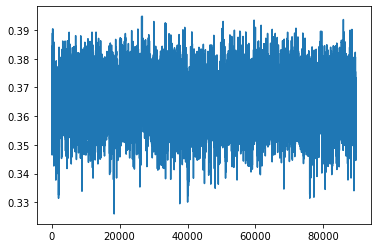

In [26]:
data1.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
plt.show()

In [61]:
data1.computePropagator("dsigma",errFunc = lambda x: blocking(x,5), decim = 1)

In [65]:
autocorrelatedErr(data1.wallCorr_raw['dsigma'][:,1])

(0.00033603729644291597, 0.0007773308896125447)

In [79]:
blocking(data1.wallCorr_raw['dsigma'][:,1],5)

(0.0003360384571280814, 5.033786684154794e-06)

In [94]:
data64.save("propagator_raw", "dsigma")

In [98]:
data64.load("propagator_raw", "dsigma")

In [101]:
data64.computePropagator("dsigma",errFunc = lambda x: blockedBootstrap(x,nBlock=1000, nSamples=100), decim = 1, alreadyLoaded = True)

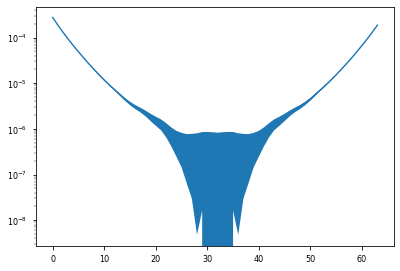

In [102]:
plotter.plot(data64,"propagator","dsigma", imOrReal = np.real)
plt.yscale('log')

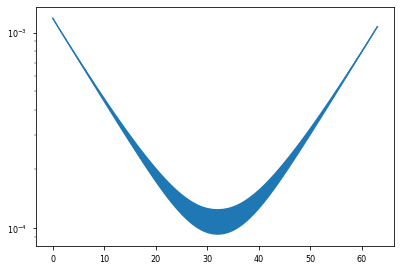

In [21]:
plotter.plot(data64,"propagator","phi", imOrReal = np.real)
plt.yscale('log')

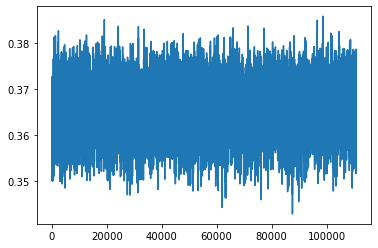

In [64]:
data64.readAv()
dt = 0.8
t=np.arange(len(data64.phi)) * dt
plt.figure(1)
plt.plot(t[:],data64.phi[:,0])
plt.show()

Compute $\langle j_A(t) j_A(0)\rangle$ correlator and Fourier transform.

In [88]:
#tMax is maximum distance in time (time units), blockSize is the size of one block  (time units). Error function is 
# to compute the error. For now, can basically choose between bootstrap and jackknife. 
data1.computeOtOtpBlocked("A", momNum = 0, tMax = 30.0, blockSizeT = 50.0,  errFunc = lambda x : bootstrap(x,10))

In [81]:
data1.save("OtOttp_blocks","A")

In [83]:
data1.load("OtOttp_blocks","A")

In [89]:
0.2*data1.OtOttp_time["A"]

array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
       1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
       3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
       5.28, 5.44, 5.6 , 5.76])

In [77]:
data1.OtOttp_blocks["A"]

array([[2.63365250e-06+0.j, 2.64118799e-06+0.j, 2.64800977e-06+0.j, ...,
        2.58454103e-06+0.j, 2.57175739e-06+0.j, 2.55878077e-06+0.j],
       [5.84123135e-07+0.j, 5.78398559e-07+0.j, 5.72288524e-07+0.j, ...,
        2.52257642e-07+0.j, 2.39232648e-07+0.j, 2.26832409e-07+0.j],
       [2.40507196e-07+0.j, 2.40606151e-07+0.j, 2.40743288e-07+0.j, ...,
        1.91359771e-07+0.j, 1.87925303e-07+0.j, 1.84467533e-07+0.j],
       ...,
       [1.60459443e-06+0.j, 1.56847322e-06+0.j, 1.53234528e-06+0.j, ...,
        4.33161521e-07+0.j, 4.03211323e-07+0.j, 3.72914520e-07+0.j],
       [2.74697168e-05+0.j, 2.74951454e-05+0.j, 2.75142931e-05+0.j, ...,
        2.50361659e-05+0.j, 2.48713652e-05+0.j, 2.46987921e-05+0.j],
       [3.69450034e-05+0.j, 3.69914921e-05+0.j, 3.70321275e-05+0.j, ...,
        3.63900338e-05+0.j, 3.63300265e-05+0.j, 3.62670446e-05+0.j]])

In [22]:
data64.computeOtOtpBlocked("A_phi", momNum = 0, tMax = 500.0, nBlocks = 5,  errFunc = lambda x : (np.mean(x,axis=0),np.std(x,axis=0)))

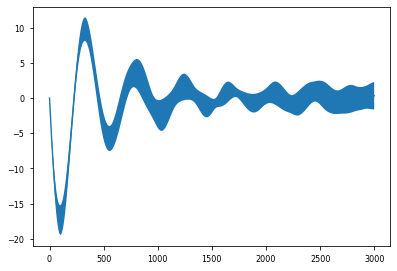

In [16]:
plotter.plot(data64,"OtOttp","A_phi")

In [32]:
data64.computeStatisticalCor("A_phi", omMax=0.06, errFunc=lambda x: (np.mean(x, axis = 0),np.std(np.real(x), axis = 0)+ 1j * np.std(np.imag(x), axis = 0)), filterFunc=lambda x : np.exp(-x / 2000.0))


/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [31]:
data64.OtOttpFourier['A_phi'].err

array([1.67936748e+01, 1.51326623e+01, 1.61302807e+01, 1.59462936e+01,
       2.23355229e+01, 1.94572993e+01, 2.18123989e+01, 1.91968554e+01,
       2.50117259e+01, 3.29084876e+01, 2.27691771e+01, 3.50965715e+01,
       5.05161423e+01, 4.86545921e+01, 5.75706480e+01, 4.48772094e+01,
       4.85225817e+01, 8.20259635e+01, 2.01930739e+02, 4.03938910e+02,
       6.25246113e+02, 1.89710933e+03, 1.81762269e+03, 5.06967706e+02,
       2.55841918e+02, 1.99693769e+02, 9.52150705e+01, 2.76551484e+01,
       4.76515638e-02, 2.76551484e+01, 9.52150705e+01, 1.99693769e+02,
       2.55841918e+02, 5.06967706e+02, 1.81762269e+03, 1.89710933e+03,
       6.25246113e+02, 4.03938910e+02, 2.01930739e+02, 8.20259635e+01,
       4.85225817e+01, 4.48772094e+01, 5.75706480e+01, 4.86545921e+01,
       5.05161423e+01, 3.50965715e+01, 2.27691771e+01, 3.29084876e+01,
       2.50117259e+01, 1.91968554e+01, 2.18123989e+01, 1.94572993e+01,
       2.23355229e+01, 1.59462936e+01, 1.61302807e+01, 1.51326623e+01,
      

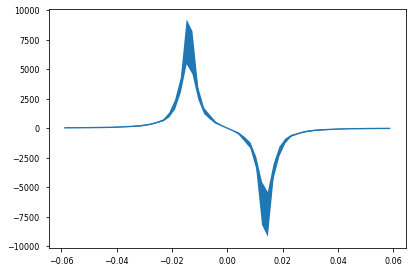

In [36]:
plotter.plot(data64,"OtOttpFourier","A_phi", imOrReal = np.imag)

In [7]:
%%time
data64.computeOtOtpBlocked("A", momNum = 4, tMax = 20.0, nBlocks = 5,  errFunc = lambda x : (np.mean(x,axis=0),np.std(x,axis=0)), redo = True)

CPU times: user 11.8 s, sys: 17.2 ms, total: 11.9 s
Wall time: 11.9 s


In [5]:
data64.load("wallF","A")    


In [6]:
data64.wallF.keys()

dict_keys(['X', 'Y', 'Z'])

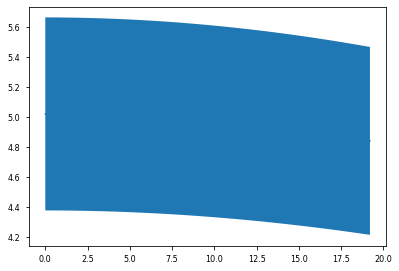

In [21]:
plotter.plot(data64, "OtOttp","A")

In [7]:
plotter.plot(data1,"OtOttp","A")

KeyError: 'A'

In [41]:
len(np.shape(1))

0

In [69]:
data1.save("OtOttp","A")

In [2]:
data1.load("OtOttp","A")

NameError: name 'data1' is not defined

In [59]:
len(data1.OtOttp_time["A"].view(float).reshape(-1, 2))

19

In [8]:
av = data64.tmpGetAv('A',5000,-1, lambda x : blockedBootstrap(x, 10,100))

In [36]:
end = 10000

In [37]:
%%time
cor = StatResult(computeOtOtp(av[:end],av[:end],autocorrelatedErr,nTMax =1000))

CPU times: user 52min 15s, sys: 1.92 s, total: 52min 16s
Wall time: 52min 19s


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

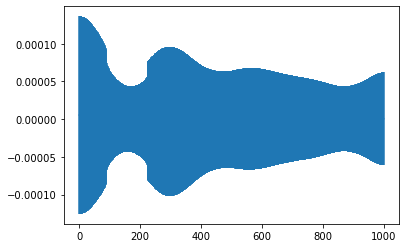

In [38]:
plt.errorbar(range(1000),cor.mean, cor.err)

In [6]:
intAutocorrrelationTime(av)

KeyboardInterrupt: 

In [6]:
%%time
data64.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : jackknife(x,10))

CPU times: user 6min, sys: 2.53 s, total: 6min 3s
Wall time: 6min 2s


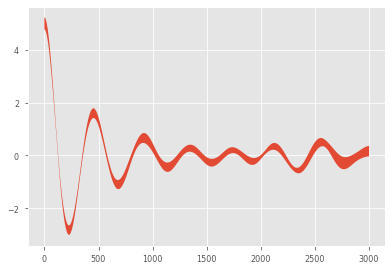

In [20]:
plotter.plot(data64,"OtOttp","A", yfact=1)


In [ ]:
import multiprocessing as mp

pool = mp.Pool(mp.cpu_count())

def id(x):
    return x

res = pool.map(id, [y for y in range(10)])

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


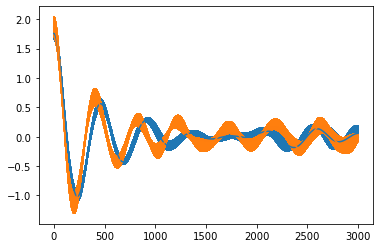

In [14]:
plotter.plot(data64,"OtOttp","A", yfact=1)
plotter.plot(data1,"OtOttp","A", yfact = 1)

In [86]:
# filterFunc is the filter to be applied to the fourrier transform, to kill a bit of the noise at late time.
data1.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))

#TODO: compute half of it and symmetrize.

True


In [88]:
(64.0/48)**3

2.37037037037037

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


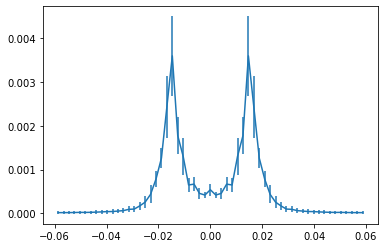

In [11]:
plotter.plot(data1,"OtOttpFourier","A")

In [83]:
data64.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))


True


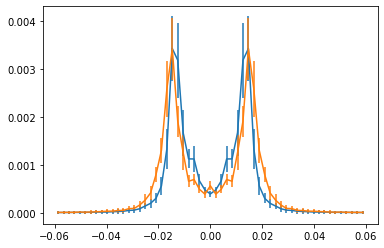

In [92]:
plotter.plot(data64,"OtOttpFourier","A", yfact=(64.0/48)**3)
plotter.plot(data1,"OtOttpFourier","A")

We compare here the results obtained from evolver 8.

In [8]:
80.0**3/64**3

1.953125

In [4]:
data2 = ConfResults(fn="../data/zminus2_N048_m-0501265_h003684_c00500_ev8.h5",thTime=400,dt=0.8, data_format="semiold")
dt=0.8

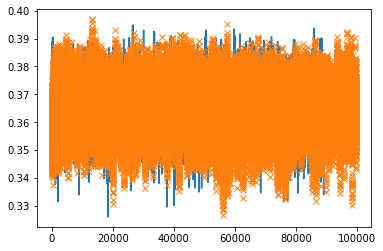

In [28]:
data2.readAv()
dt = 0.8
t=np.arange(len(data1.phi)) * dt
plt.figure(1)
plt.plot(t[:],data1.phi[:,0])
t=np.arange(len(data2.phi)) * dt
plt.plot(t[:],data2.phi[:,0],'x')
plt.show()

In [33]:
data2.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,50))

<ErrorbarContainer object of 3 artists>

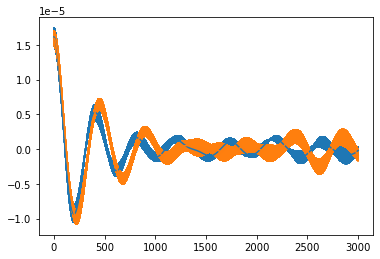

In [34]:
plotter.plot(data1,"OtOttp","A")
plotter.plot(data2,"OtOttp","A")

In [83]:
data2.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))


<ErrorbarContainer object of 3 artists>

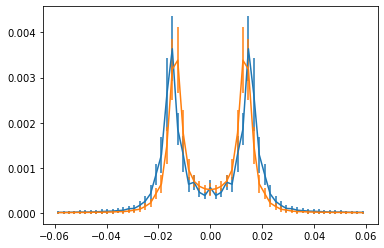

In [84]:
plotter.plot(data1,"OtOttpFourier","A")
plotter.plot(data2,"OtOttpFourier","A")

In [44]:
data2.computeOtOtpBlocked("phi",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

In [15]:
plotter.plot(data2,"OtOttp","phi")

NameError: name 'data2' is not defined

In [106]:
data2.computeStatisticalCor("phi", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2500.0))


(-0.01, 0.08)

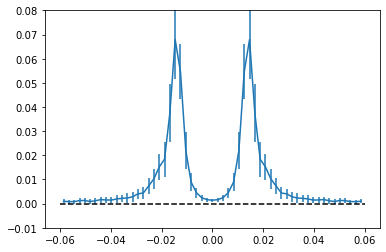

In [107]:
plotter.plot(data2,"OtOttpFourier","phi")
plt.plot([-0.06,0.06],[0,0],'--k')
plt.ylim([-0.01,0.08])

In [5]:
data2.computeOtOtpBlocked("phi0",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10), conn=True)

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

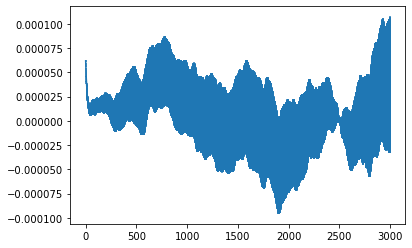

In [6]:
plotter.plot(data2,"OtOttp","phi0")


In [7]:
data2.computeStatisticalCor("phi0", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 200.0))


<ErrorbarContainer object of 3 artists>

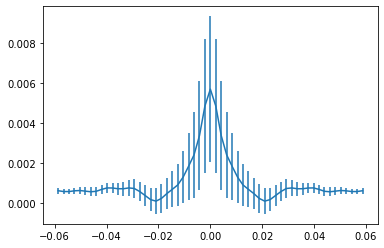

In [8]:
plotter.plot(data2,"OtOttpFourier","phi0")


# Unbroken phase

In [39]:
data3 = ConfResults(fn="../data/zplus_N048_m-0445648_h003684_c00500.h5",thTime=400,dt=0.8, data_format="old")
dt=0.8

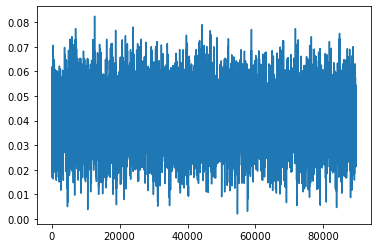

In [54]:
data3.readAv()
dt = 0.8
t=np.arange(len(data3.phi)) * dt
plt.figure(1)
plt.plot(t[:],data3.phi[:,0])
plt.show()

In [60]:
data3.computeOtOtpBlocked("A",tMax = 5000.0, blockSizeT = 8000.0,  errFunc = lambda x : bootstrap(x,10))

<ErrorbarContainer object of 3 artists>

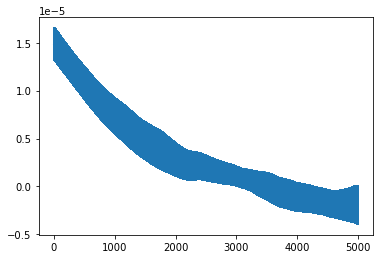

In [61]:
plotter.plot(data3,"OtOttp","A")


In [108]:
data3.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 4000.0))


<ErrorbarContainer object of 3 artists>

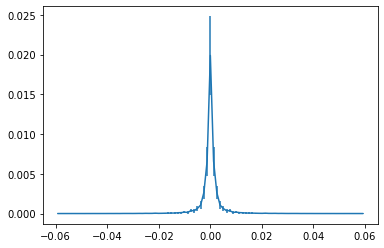

In [109]:
plotter.plot(data3,"OtOttpFourier","A")


In [14]:
data3.computeOtOtpBlocked("phi0",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10), conn=True)

<ErrorbarContainer object of 3 artists>

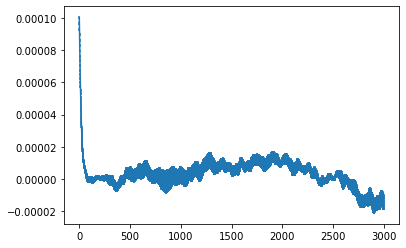

In [19]:
plotter.plot(data3,"OtOttp","phi0")


In [26]:
data3.computeStatisticalCor("phi0", omMax=0.12, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 200.0))


<ErrorbarContainer object of 3 artists>

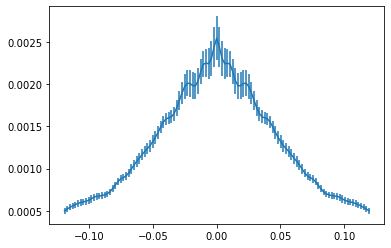

In [27]:
plotter.plot(data3,"OtOttpFourier","phi0")


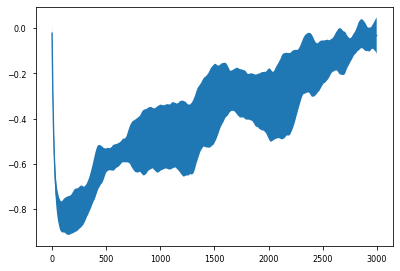

In [42]:
plotter.plot(data3,"OtOttp","A_phi")


In [41]:
data3.computeOtOtpBlocked("A_phi",tMax = 3000.0, nBlocks = 5,  errFunc = lambda x : (np.mean(x,axis = 0), np.std(x, axis = 0)), conn=True)

# Critical line

We want to see some scaling. From Hohenberg and Halperin, the dynamical scaling for the response function is
$$
\rho(\omega,\vec{k}) = \rho(\vec{k}) Y\left(\frac{\omega}{\Omega_0}\xi^z,k\xi,\frac{K_0}{|h_\psi|^{1/\beta\delta}}\Delta T\right)
$$
with $\xi$ the correlation length. At $\vec{k}=0, \Delta T =0$, it reduces to 
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}\xi^z\right) \ .
$$
In terms of $h$, we have $\xi=h^{-\nu_c}$ and we thus expect
$$
\rho(\omega,0) = \rho_0 Y\left(\frac{\omega}{\Omega_0}h^{-\nu_c z}\right) \ .
$$
From Derek's notebook (and paper by Engels), $\nu_c = 0.402432$ and we expect $z\approx 1.5$, giving

In [51]:
nuc = 0.402432
z = 1.5
-nuc * z

def rescaling(h, href):
    return (h/href)**(-nuc * z)

In [19]:
data = dict()
#data["h0002"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
#data["h0004"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h004000_c00500.h5",thTime=400,dt=0.8, data_format="new")
#data["h0006"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h006000_c00500.h5",thTime=400,dt=0.8,data_format="new")
#data["h001"] = ConfResults(fn="../data/zcritical_N048_m-0482300_h010000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["h0002"] = ConfResults(fn="../data/zcritical_N048_m-0481300_h002000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["h0004"] = ConfResults(fn="../data/zcritical_N048_m-0481300_h004000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data["h0006"] = ConfResults(fn="../data/zcritical_N048_m-0481300_h006000_c00500.h5",thTime=400,dt=0.8,data_format="new")
data["h001"] = ConfResults(fn="../data/zcritical_N048_m-0481300_h010000_c00500.h5",thTime=400,dt=0.8, data_format="new")

hkeys = ["h0002", "h0004", "h0006", "h001"]

hs = dict()
hs["h0002"] = 0.002
hs["h0004"] = 0.004
hs["h0006"] = 0.006
hs["h001"] = 0.01

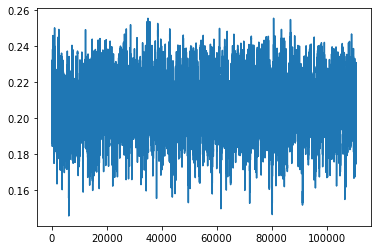

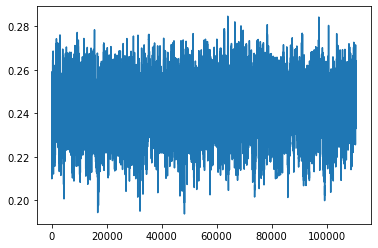

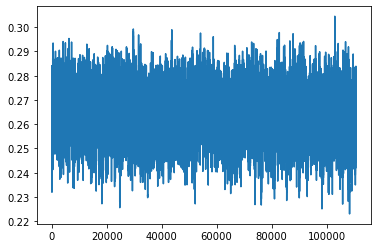

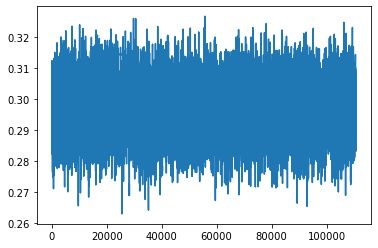

In [20]:
c=0
for k in hkeys:
    data[k].readAv()
    dt = 0.8
    t=np.arange(len(data[k].phi)) * dt
    plt.figure(c)
    plt.plot(t[:],data[k].phi[:,0])
    plt.show()
    c+=1

In [21]:
for k in hkeys:
    print(k)
    data[k].computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

h0002
h0004
h0006
h001


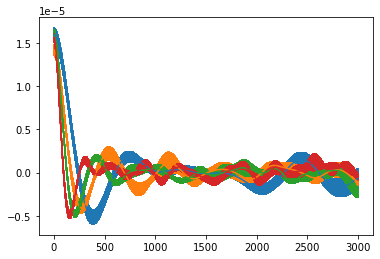

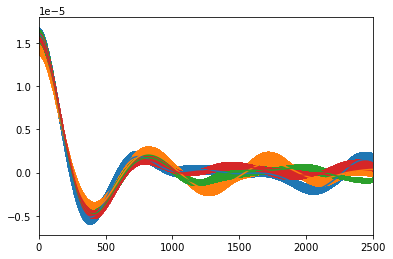

In [48]:
c=0
for k in hkeys:
    plt.figure(0)
    plotter.plot(data[k],"OtOttp","A")
#plt.xlim([0,10])

plt.figure(2)
for k in hkeys:
    plotter.plot(data[k],"OtOttp","A", xfact= 1.0 / rescaling(hs[k],0.002))
plt.xlim([0,2500])

plt.show()


In [23]:
data[hkeys[0]].computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 1500.0))
data[hkeys[1]].computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 2000.0))
data[hkeys[2]].computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 1500.0))
data[hkeys[3]].computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 1000.0))


True
True
True
True


In [43]:
plotter = Plotter()

(0.0, 0.03)

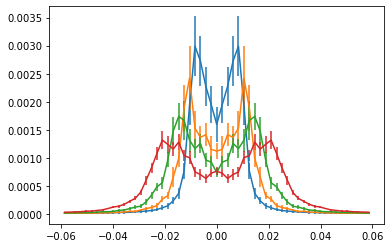

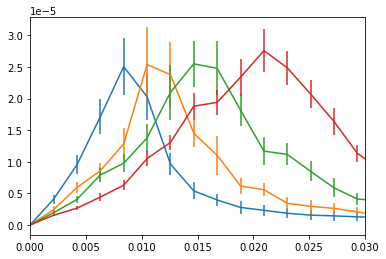

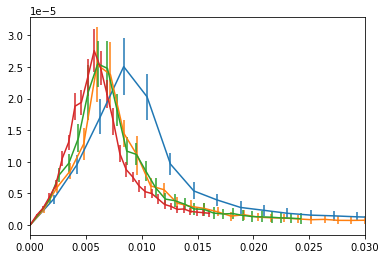

In [50]:
plt.figure(1)
for k in hkeys:
    plotter.plot(data[k],"OtOttpFourier","A")
plt.figure(2)

for k in hkeys:
    plotter.plot(data[k],"OtOttpFourier","A", yfact = np.abs(data[k].OtOttpFourier_oms["A"]))
   # plt.errorbar(data[k].OtOttpFourier_oms["A"], np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].mean, np.abs(data[k].OtOttpFourier_oms["A"]) * data[k].OtOttpFourier["A"].err)
plt.xlim([0,0.03])


plt.figure(3)
for k in hkeys:
    plotter.plot(data[k],"OtOttpFourier","A", xfact = rescaling(hs[k], 0.002) , yfact = np.abs(data[k].OtOttpFourier_oms["A"]))

plt.xlim([0,0.03])


# Around the pseudocritical point

In [56]:
data4 = ConfResults(fn="../data/zpseudocritical_N048_m-0472600_h003000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data5 = ConfResults(fn="../data/z1p484_N048_m-0471773_h003000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data6 = ConfResults(fn="../data/z1p372_N048_m-0472500_h003000_c00500.h5",thTime=400,dt=0.8, data_format="new")
data7 = ConfResults(fn="../data/z1p416_N048_m-0472200_h003000_c00500.h5",thTime=400,dt=0.8, data_format="new")

dt=0.8


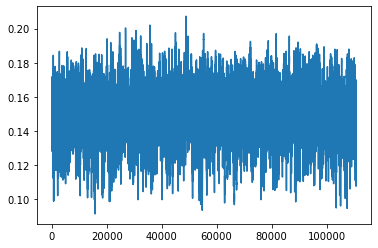

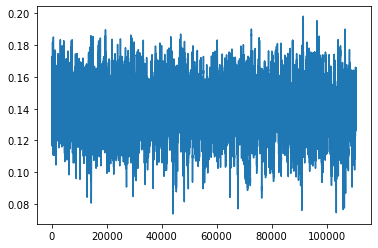

In [13]:
data4.readAv()
dt = 0.8
t=np.arange(len(data4.phi)) * dt
plt.figure(1)
plt.plot(t[:],data4.phi[:,0])
plt.show()
data5.readAv()
dt = 0.8
t=np.arange(len(data5.phi)) * dt
plt.figure(1)
plt.plot(t[:],data5.phi[:,0])
plt.show()

In [75]:
data4.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

In [15]:
data5.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

In [57]:
data6.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

In [58]:
data7.computeOtOtpBlocked("A",tMax = 3000.0, blockSizeT = 5000.0,  errFunc = lambda x : bootstrap(x,10))

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


<ErrorbarContainer object of 3 artists>

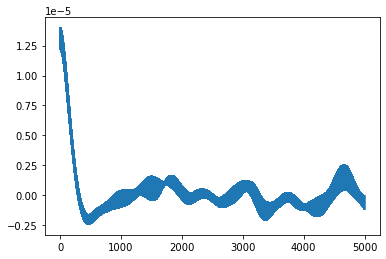

In [76]:
plotter.plot(data4,"OtOttp","A")


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


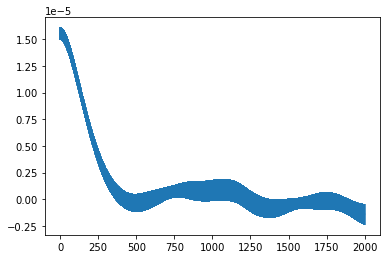

In [16]:
plotter.plot(data5,"OtOttp","A")


In [77]:
data4.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 3000.0))

In [17]:
data5.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 3000.0))

True


In [59]:
data6.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 3000.0))

True


In [60]:
data7.computeStatisticalCor("A", omMax=0.06, errFunc=lambda x: bootstrap(x,10), filterFunc=lambda x : np.exp(-x / 3000.0))

True


<ErrorbarContainer object of 3 artists>

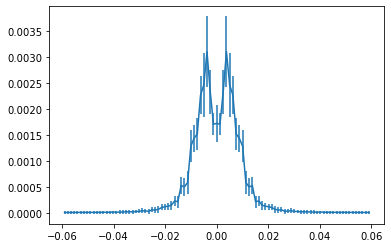

In [62]:
plotter.plot(data4,"OtOttpFourier","A")


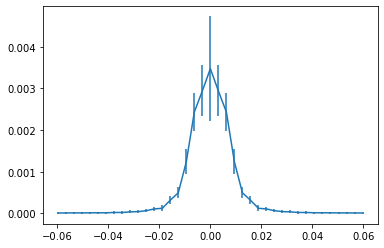

In [18]:
plotter.plot(data5,"OtOttpFourier","A")


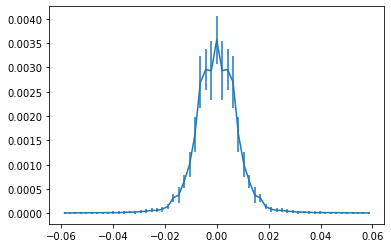

In [62]:
plotter.plot(data6,"OtOttpFourier","A")


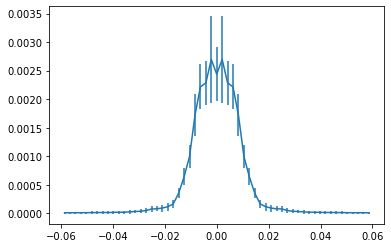

In [61]:
plotter.plot(data7,"OtOttpFourier","A")


# Dead code

Old, deprecated primitive fitting, to be improved.

In [119]:
oms, res, resErr = toFourierBlocked(ttest, dt, 0.06, lambda x: jackknife(x,3), M=1.0/2000.0)
oms2, res2, resErr2 = toFourierBlocked(ttest, dt, 0.06, lambda x: bootstrap(x,10), M=1.0/2000.0)

<ErrorbarContainer object of 3 artists>

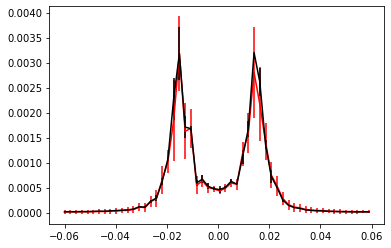

In [121]:
#plt.errorbar(oms,res,resErr)
plt.errorbar(oms2,res2,resErr2,color='r')
plt.errorbar(oms,res,resErr,color='k')

#plt.plot(oms,res,'kx')
#plt.fill_between(oms,res-resErr,res+resErr)
#plt.yscale('log')


In [6]:
#v2 = sigma2 / chi0
0.365**2 / 6.5

0.020496153846153845

In [4]:
(0.003684 / 0.365 * 0.02)**0.5

0.014207850424980907

In [633]:
def AnPoleMass(m0, H, chi):
    return (m0* H / chi)**0.5

AnPoleMass(0.365,  0.003684, 5.0)

0.016399146319244794

In [497]:
def BW(x, a,m,c):
    return  (a / ((-(x)**2 + m**2)**2 + c * (x)**2 )  )

def sBW(x, a,m,c):
    return  a / ((-x + m)**2 + c  )  

def doubleBW(x,a,b,c):
    return sBW(x,a,b,c) + sBW(-x,a,b,c)

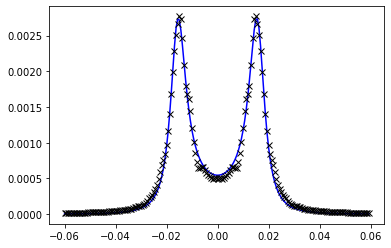

In [536]:

plt.figure(0)
res, cov = curve_fit(doubleBW, oms,np.real(resA),[0.00000003,mp,0.00001])
#plt.plot(oms, doubleBW(oms,res[0],res[1],res[2]),'r')

res2, cov2 = curve_fit(BW, oms,np.real(resA),[0.0003*res[0],res[1],res[2]])

plt.plot(oms, BW(oms,res2[0],res2[1],res2[2]),'b')

plt.plot(oms,np.real(resA),'kx')

In [11]:
test = h5py.File("../data/zplus_N048_m-0445648_h003684_c00500.h5",'r')

In [12]:
test.keys()

<KeysViewHDF5 ['phi', 'wallX_phi_0', 'wallX_phi_1', 'wallX_phi_10', 'wallX_phi_2', 'wallX_phi_3', 'wallX_phi_4', 'wallX_phi_5', 'wallX_phi_6', 'wallX_phi_7', 'wallX_phi_8', 'wallX_phi_9']>

In [21]:
res=np.asarray(test["phi"])

In [23]:
np.shape(res)

(125000, 13)

In [2]:
data = ConfResults(fn="../data/zminus2_N080_m-0501265_h003684_c00500.h5",thTime=400,dt=0.8,  data_format="old")
dt=0.8

In [155]:
data.load("OtOttp","A", direc="../python")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


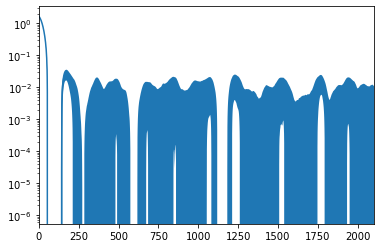

In [157]:
plotter.plot(data,"OtOttp","A")
plt.xlim([0,2100])
#plt.plot([-0.06,5000],[0,0])
plt.savefig("ACorr80")
plt.yscale('log')

In [158]:
data.load("OtOttpFourier","A", direc="../python")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


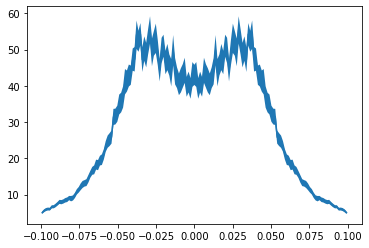

In [159]:
plotter.plot(data,"OtOttpFourier","A")
#plt.yscale('log')
plt.savefig("ACorrFourier80")


In [160]:
data.load("OtOttp_blocks","A", direc="../python")

In [164]:
data.computeStatisticalCor("A", omMax=0.15, errFunc=lambda x: bootstrap(x,100), filterFunc=lambda x : np.exp(-x / 300.0))

True


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


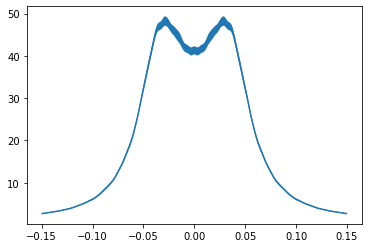

In [165]:
plotter.plot(data,"OtOttpFourier","A")
#plt.yscale('log')

In [137]:
data.load("OtOttpFourier","phi", direc="../python")

In [122]:
data.load("OtOttp_blocks","phi", direc="../python")

In [141]:
data.computeStatisticalCor("A", omMax=0.1, errFunc=lambda x: bootstrap(x,100), filterFunc=lambda x : np.exp(-x / 3000.0))

True


/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


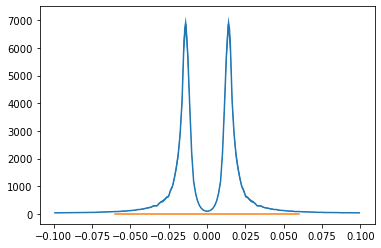

In [142]:
plotter.plot(data,"OtOttpFourier","phi")
plt.plot([-0.06,0.06],[0,0])
#plt.ylim(0,5e-4*80**3)

In [110]:
data.load("OtOttpFourier","phi0", direc="../python")

/Users/adrien/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/adrien/miniconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]


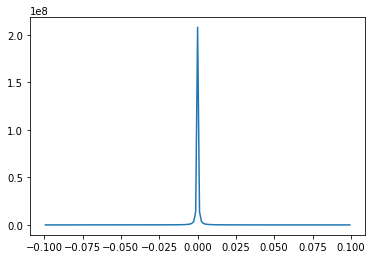

In [111]:
plotter.plot(data,"OtOttpFourier","phi0")


In [19]:
data.load("OtOttpFourier","V", direc="../python")

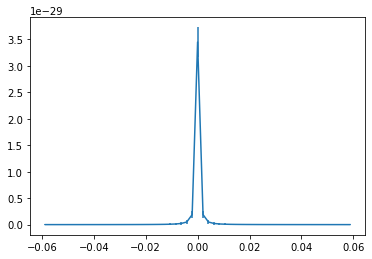

In [20]:
plotter.plot(data,"OtOttpFourier","V")
